Assignment:
- Code the algorithm of the Hadamard test that we covered in class using the Python SDK.
- Execute it from the SDK using 1,000 , 2,000 , 4,000 , 8,000 and 16,000 shots
- For each job calculate the (real part of the) expectation value using the formula 

$Re\lbrace<0\mid U_{QFT}\mid0>\rbrace=2P_0-1$


- Plot a graph of the expectation value as a function of the number of shots. Add the theoretical value to the graph. Explain the results. 

In [1]:
import classiq

In [4]:
classiq.authenticate(overwrite=True)

Your user code: PPPX-BCGF
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=PPPX-BCGF


In [20]:
from classiq import qfunc, create_model, set_execution_preferences, synthesize, control, H, qft, allocate, Output, QBit, QArray, execute
from classiq.execution import ExecutionPreferences
from classiq import show


@qfunc
def main(expectation_value: Output[QBit]):
    allocate(1, out=expectation_value)
    psi = QArray("psi")
    allocate(4, out = psi)
    
    H(expectation_value)
    # Apply controlled QFT on psi
    control(ctrl= expectation_value, operand=lambda: qft(psi))
    H(expectation_value)



qprogs = []
res = []
shots =  [1000 , 2000 , 4000 , 8000, 16000]
for shot in shots: 
    qmod = create_model(main)

    qmod = set_execution_preferences(
        qmod, execution_preferences=ExecutionPreferences(num_shots=shot)
    )
    
    # Synthesize the quantum program
    qprog = synthesize(qmod)
    qprogs.append(qprog)
    res.append(execute(qprog).result())
    # Optionally, print the synthesized quantum program
    #print(qprog)
    #show(qprog)

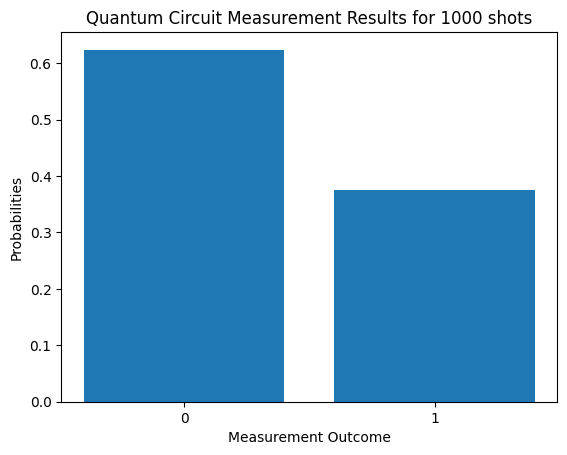

{'1': 376, '0': 624}
Expected Value = 0.248


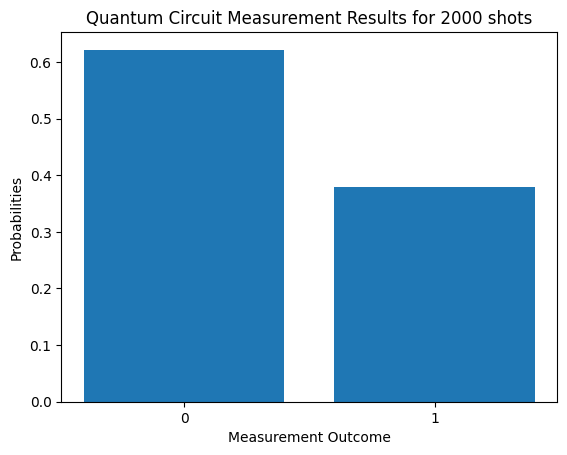

{'1': 757, '0': 1243}
Expected Value = 0.2430000000000001


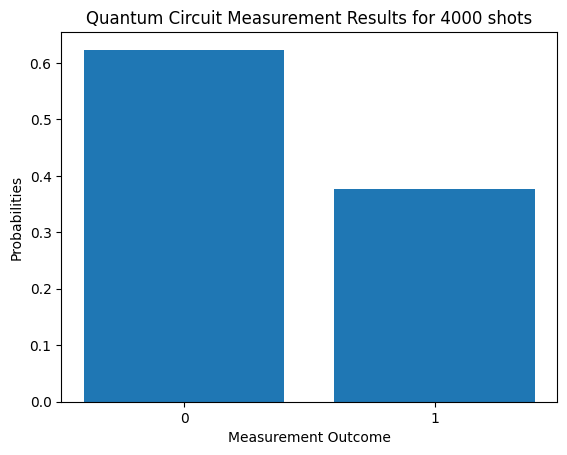

{'0': 2493, '1': 1507}
Expected Value = 0.24649999999999994


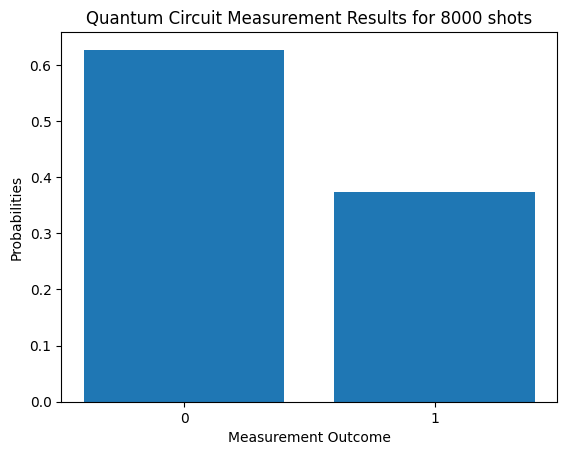

{'1': 2985, '0': 5015}
Expected Value = 0.2537499999999999


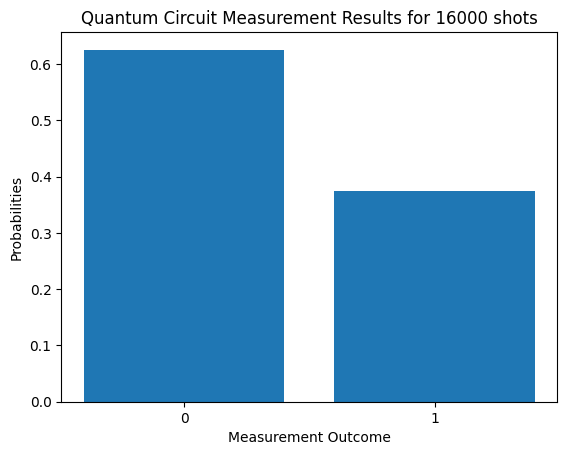

{'1': 5987, '0': 10013}
Expected Value = 0.251625


In [22]:
import matplotlib.pyplot as plt
i = 0 
expectation_values = []
for result in res:
    shot = shots[i]
    counts = result[0].value.counts
   

    p0 = counts['0']/(counts['0']+counts['1'])
    p1 = counts['1']/(counts['0']+counts['1'])
    # Plot the probabilities
    plt.bar(['0','1'], [p0,p1])
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Probabilities')
    plt.title(f'Quantum Circuit Measurement Results for {shot} shots')
    plt.show()

    print(counts)
    exp = 2*p0 - 1
    expectation_values.append(exp)
    print(f"Expected Value = {exp}")    
  

    i = i+1

In [30]:
from classiq import write_qmod

write_qmod(qmod, "hadamard_test", decimal_precision=15)

## Calculating the Theoretical Expectation Value 



 **Quantum Fourier Transform (QFT):**
   The QFT is a linear transformation on quantum bits and is the quantum analogue of the discrete Fourier transform. The QFT maps the computational basis state $|k\rangle$ to the state:
   $$
   U_{\text{QFT}} |k\rangle = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} e^{2\pi i k j / N} |j\rangle
   $$
   where $N = 2^n$ for an $n$-qubit system.



### Calculating $\langle 0 | U_{\text{QFT}} | 0 \rangle$

When the QFT is applied to the state $|0\rangle$, the result is:
$$
U_{\text{QFT}} |0\rangle = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n - 1} |j\rangle
$$
 QFT of the state $|0\rangle$ is a uniform superposition of all possible states.

### Inner Product Calculation


$$
\langle 0 | U_{\text{QFT}} | 0 \rangle = \langle 0 | \left( \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n - 1} |j\rangle \right)
$$

Since $\langle 0 | j \rangle = 0$ for all $j \neq 0$ and $\langle 0 | 0 \rangle = 1$, we get:
$$
\langle 0 | U_{\text{QFT}} | 0 \rangle = \langle 0 | \left( \frac{1}{\sqrt{2^n}} |0\rangle + \frac{1}{\sqrt{2^n}} \sum_{j=1}^{2^n - 1} |j\rangle \right) = \frac{1}{\sqrt{2^n}}
$$

### Final Expectation Value

Since we are dealing with a uniform superposition where each basis state $|j\rangle$ has an amplitude of $\frac{1}{\sqrt{2^n}}$, the inner product simplifies to:
$$
\langle 0 | U_{\text{QFT}} | 0 \rangle = \frac{1}{\sqrt{2^n}}
$$


For a general $n$-qubit system, the expectation value $\langle 0 | U_{\text{QFT}} | 0 \rangle$ decreases as the number of qubits increases, reflecting the fact that the initial state $|0\rangle$ has a small overlap with the uniform superposition state resulting from QFT.



In [86]:


def qft_matrix(n):
    """Return the QFT matrix for n qubits."""
    omega = np.exp(2 * np.pi * 1j / 2**n)
    qft = np.array([[omega**(i*j) for j in range(2**n)] for i in range(2**n)]) / np.sqrt(2**n)
    return qft

def zero_state(n):
    zero = np.zeros(2**n)
    zero[0] = 1
    return zero

n = 4  # Number of qubits
qft = qft_matrix(n)
psi = zero_state(n)

# Compute the expectation value <psi|QFT|psi>
expectation_value = np.vdot(psi, np.dot(qft, psi)).real
print("Theoretical Expectation Value:", expectation_value)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Theoretical Expectation Value: 0.25


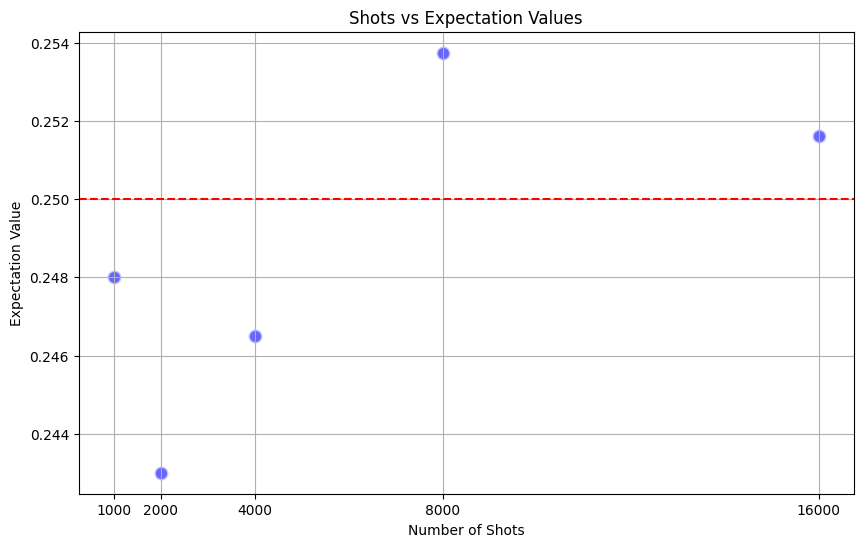

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(shots, expectation_values, color='blue', s=100, alpha=0.6, edgecolors='w', linewidth=2)
plt.axhline(y=0.25, color='red', linestyle='--', label='Theoretical Value (0.25)')
plt.ylabel('Expectation Value')
plt.xlabel('Number of Shots')
plt.title('Shots vs Expectation Values')
plt.xticks(shots) 
plt.grid(True)
plt.show()

We converge towards the theoretical expectation value of 0.25 as the shots increase